In [1]:
!nvidia-smi

Fri May 14 15:23:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
images_path = '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/'


In [5]:
images = glob(images_path+'*.jpg')

In [6]:
images

['/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381052465_722e00807b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381239475_044cbffa2b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381275595_b429fd1639.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381514859_b40418d9c3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381976882_0063d16d88.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382090166_be2c2c63e1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382151094_c7376cf22b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382701159_f98c1988cd.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/383223174_7165a54c30.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/384465370_9918873

In [7]:
len(images)

8091

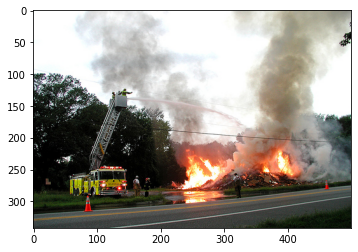

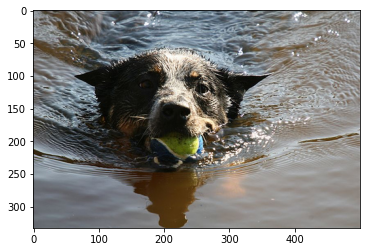

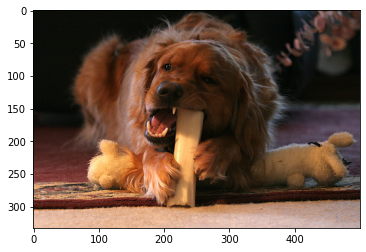

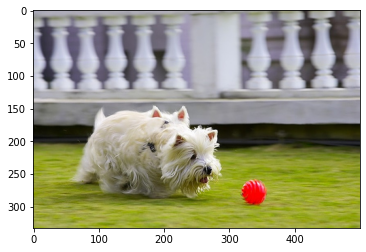

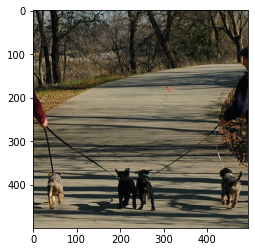

In [8]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [9]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [54]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [55]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 2000:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000


In [57]:
images_features

{'381052465_722e00807b.jpg': array([0.17548257, 0.12192754, 0.05968565, ..., 0.50444454, 0.09549847,
        0.06983174], dtype=float32),
 '381239475_044cbffa2b.jpg': array([0.24349326, 0.15015584, 0.09791537, ..., 0.15034167, 0.27075   ,
        0.699996  ], dtype=float32),
 '381275595_b429fd1639.jpg': array([1.2951114 , 1.1443082 , 0.34324363, ..., 1.0765115 , 0.52931035,
        0.8652884 ], dtype=float32),
 '381514859_b40418d9c3.jpg': array([0.37732053, 1.6968107 , 0.10386685, ..., 0.01395029, 0.111348  ,
        0.06575258], dtype=float32),
 '381976882_0063d16d88.jpg': array([0.29948857, 0.12540372, 0.4403772 , ..., 0.647745  , 0.15434402,
        1.226943  ], dtype=float32),
 '382090166_be2c2c63e1.jpg': array([0.08697266, 1.1559387 , 0.0687595 , ..., 0.15479149, 0.0139553 ,
        0.09044285], dtype=float32),
 '382151094_c7376cf22b.jpg': array([2.499218  , 1.4378778 , 0.27357087, ..., 0.        , 0.24236183,
        0.13561752], dtype=float32),
 '382701159_f98c1988cd.jpg': array

In [58]:
captions = open('/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/captions.txt', 'rb').read().decode('utf-8').split('\n')

In [59]:
captions

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow wi

In [60]:
len(captions)

40457

In [61]:
captions[1].split(',')[1]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [62]:
captions[1].split(',')[0]

'1000268201_693b08cb0e.jpg'

In [63]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass
    

In [64]:
captions_dict

{'3293751136_b0ce285dc3.jpg': ['A couple is sharing a kiss on a cold sunny day .',
  'A couple kissing on a sidewalk in a city during winter .',
  'a man in a tan jacket is kissing a girl in a pink jacket on a city street as a yellow taxi passes by .',
  'Teen girl in a parka kissing teen boy in a brown jacket on a snowy street',
  'Two people in coats kiss on the side of a road .'],
 '3293751640_d81a6f3a0c.jpg': ['A man is standing in front of a brick storefront wearing a black jacket .',
  'A man standing on a city street .',
  'The man is in front of a building',
  'Young man in warm coat outside storefront .',
  'Young man with cap and buttoned coat stands before building .'],
 '3293753378_7a8ddb98b2.jpg': ['A fashionably dressed woman holding a record in a frame at a used bookstore .',
  'A girl and a guy shop for records in a music store .',
  'A man and woman look at music cds .',
  'A woman holds a framed piece of art at a store while another man shops .',
  'Shoppers in a reco

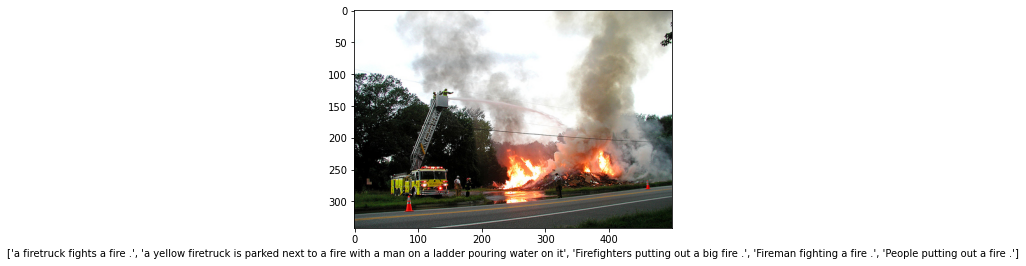

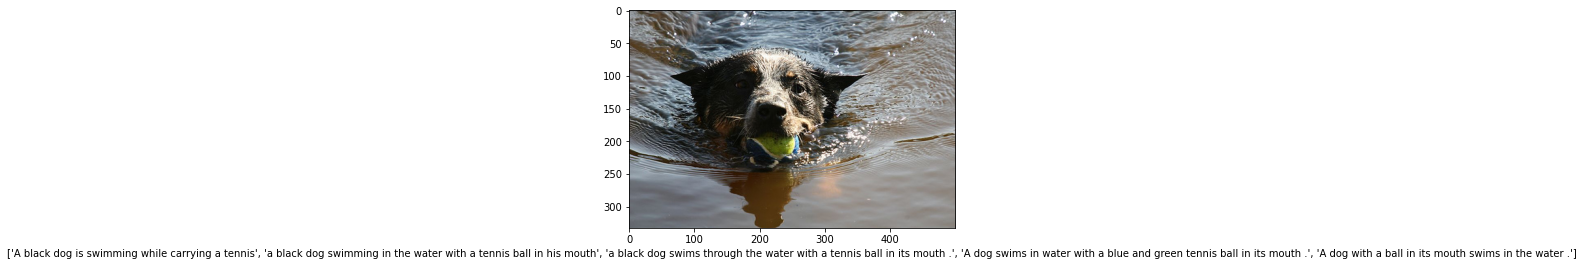

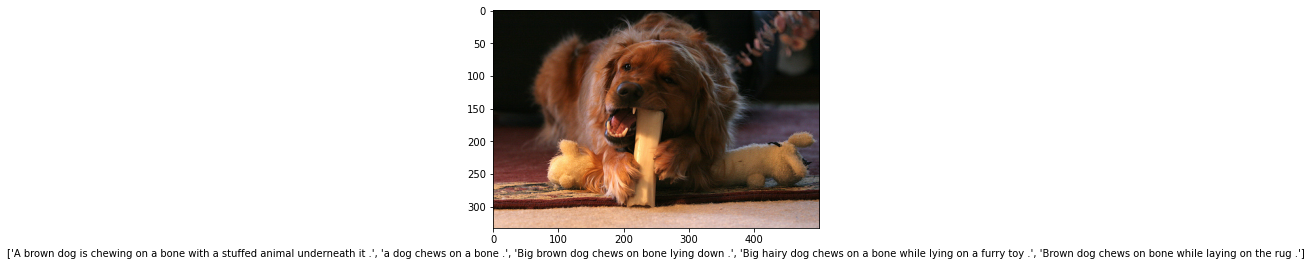

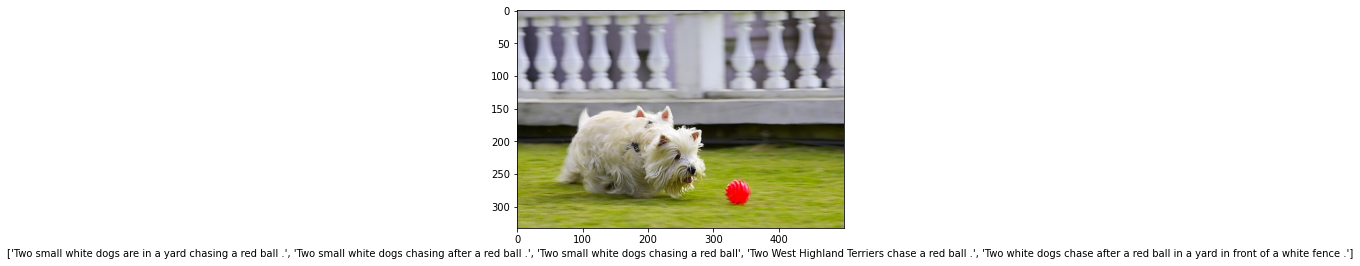

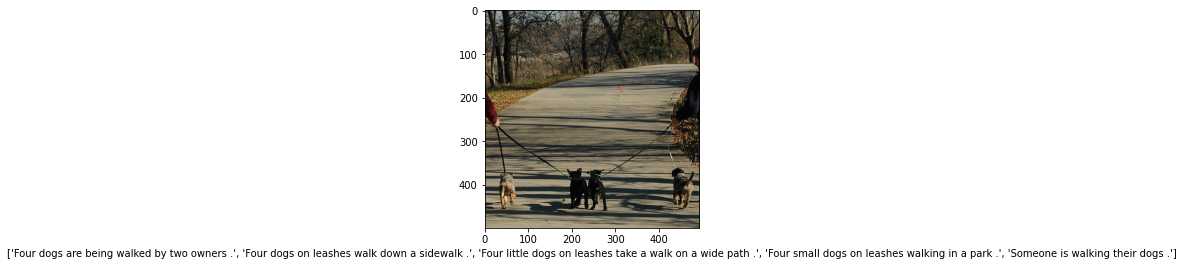

In [65]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [66]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [67]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [68]:
captions_dict


{'3293751136_b0ce285dc3.jpg': ['startofseq a couple is sharing a kiss on a cold sunny day . endofseq',
  'startofseq a couple kissing on a sidewalk in a city during winter . endofseq',
  'startofseq a man in a tan jacket is kissing a girl in a pink jacket on a city street as a yellow taxi passes by . endofseq',
  'startofseq teen girl in a parka kissing teen boy in a brown jacket on a snowy street endofseq',
  'startofseq two people in coats kiss on the side of a road . endofseq'],
 '3293751640_d81a6f3a0c.jpg': ['startofseq a man is standing in front of a brick storefront wearing a black jacket . endofseq',
  'startofseq a man standing on a city street . endofseq',
  'startofseq the man is in front of a building endofseq',
  'startofseq young man in warm coat outside storefront . endofseq',
  'startofseq young man with cap and buttoned coat stands before building . endofseq'],
 '3293753378_7a8ddb98b2.jpg': ['startofseq a fashionably dressed woman holding a record in a frame at a used b

In [69]:
count_words = {}
count=1
for s,v in captions_dict.items():
    print(s)
    print(v)
    for vv in v:
        for word in vv.split():
            if word not in count_words:
              count_words[word]=count
              count = count+1

3293751136_b0ce285dc3.jpg
['startofseq a couple is sharing a kiss on a cold sunny day . endofseq', 'startofseq a couple kissing on a sidewalk in a city during winter . endofseq', 'startofseq a man in a tan jacket is kissing a girl in a pink jacket on a city street as a yellow taxi passes by . endofseq', 'startofseq teen girl in a parka kissing teen boy in a brown jacket on a snowy street endofseq', 'startofseq two people in coats kiss on the side of a road . endofseq']
3293751640_d81a6f3a0c.jpg
['startofseq a man is standing in front of a brick storefront wearing a black jacket . endofseq', 'startofseq a man standing on a city street . endofseq', 'startofseq the man is in front of a building endofseq', 'startofseq young man in warm coat outside storefront . endofseq', 'startofseq young man with cap and buttoned coat stands before building . endofseq']
3293753378_7a8ddb98b2.jpg
['startofseq a fashionably dressed woman holding a record in a frame at a used bookstore . endofseq', 'startof

In [70]:
count_words

{'startofseq': 1,
 'a': 2,
 'couple': 3,
 'is': 4,
 'sharing': 5,
 'kiss': 6,
 'on': 7,
 'cold': 8,
 'sunny': 9,
 'day': 10,
 '.': 11,
 'endofseq': 12,
 'kissing': 13,
 'sidewalk': 14,
 'in': 15,
 'city': 16,
 'during': 17,
 'winter': 18,
 'man': 19,
 'tan': 20,
 'jacket': 21,
 'girl': 22,
 'pink': 23,
 'street': 24,
 'as': 25,
 'yellow': 26,
 'taxi': 27,
 'passes': 28,
 'by': 29,
 'teen': 30,
 'parka': 31,
 'boy': 32,
 'brown': 33,
 'snowy': 34,
 'two': 35,
 'people': 36,
 'coats': 37,
 'the': 38,
 'side': 39,
 'of': 40,
 'road': 41,
 'standing': 42,
 'front': 43,
 'brick': 44,
 'storefront': 45,
 'wearing': 46,
 'black': 47,
 'building': 48,
 'young': 49,
 'warm': 50,
 'coat': 51,
 'outside': 52,
 'with': 53,
 'cap': 54,
 'and': 55,
 'buttoned': 56,
 'stands': 57,
 'before': 58,
 'fashionably': 59,
 'dressed': 60,
 'woman': 61,
 'holding': 62,
 'record': 63,
 'frame': 64,
 'at': 65,
 'used': 66,
 'bookstore': 67,
 'guy': 68,
 'shop': 69,
 'for': 70,
 'records': 71,
 'music': 72,
 'st

In [71]:
len(count_words)


4553

In [72]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            encoded.append(count_words[word])
        captions_dict[k][vv.index(v)] = encoded

In [73]:
captions_dict

{'3293751136_b0ce285dc3.jpg': [[1, 2, 3, 4, 5, 2, 6, 7, 2, 8, 9, 10, 11, 12],
  [1, 2, 3, 13, 7, 2, 14, 15, 2, 16, 17, 18, 11, 12],
  [1,
   2,
   19,
   15,
   2,
   20,
   21,
   4,
   13,
   2,
   22,
   15,
   2,
   23,
   21,
   7,
   2,
   16,
   24,
   25,
   2,
   26,
   27,
   28,
   29,
   11,
   12],
  [1, 30, 22, 15, 2, 31, 13, 30, 32, 15, 2, 33, 21, 7, 2, 34, 24, 12],
  [1, 35, 36, 15, 37, 6, 7, 38, 39, 40, 2, 41, 11, 12]],
 '3293751640_d81a6f3a0c.jpg': [[1,
   2,
   19,
   4,
   42,
   15,
   43,
   40,
   2,
   44,
   45,
   46,
   2,
   47,
   21,
   11,
   12],
  [1, 2, 19, 42, 7, 2, 16, 24, 11, 12],
  [1, 38, 19, 4, 15, 43, 40, 2, 48, 12],
  [1, 49, 19, 15, 50, 51, 52, 45, 11, 12],
  [1, 49, 19, 53, 54, 55, 56, 51, 57, 58, 48, 11, 12]],
 '3293753378_7a8ddb98b2.jpg': [[1,
   2,
   59,
   60,
   61,
   62,
   2,
   63,
   15,
   2,
   64,
   65,
   2,
   66,
   67,
   11,
   12],
  [1, 2, 22, 55, 2, 68, 69, 70, 71, 15, 2, 72, 73, 11, 12],
  [1, 2, 19, 55, 61, 74, 65, 72

In [74]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [75]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 2, 6, 7, 2, 8, 9, 10, 11, 12]
[1, 2, 19, 15, 2, 20, 21, 4, 13, 2, 22, 15, 2, 23, 21, 7, 2, 16, 24, 25, 2, 26, 27, 28, 29, 11, 12]
[1, 2, 19, 53, 322, 7, 170, 327, 4, 328, 65, 38, 61, 53, 2, 130, 326, 55, 218, 329, 202, 114, 203, 330, 42, 15, 43, 40, 2, 218, 331, 323, 11, 12]


In [76]:
MAX_LEN

34

In [77]:
VOCAB_SIZE = len(count_words)
def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=(VOCAB_SIZE+1))[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [78]:
X, y_in, y_out = generator(images_features, captions_dict)

In [79]:

len(X), len(y_in), len(y_out)


(122365, 122365, 122365)

In [80]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [81]:
X.shape, y_in.shape, y_out.shape

((122365, 2048), (122365, 34), (122365, 4554))

In [82]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [83]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)+1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)


model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 128)           582912    
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 34, 128)           32896     
Total params: 1,010,048
Tr

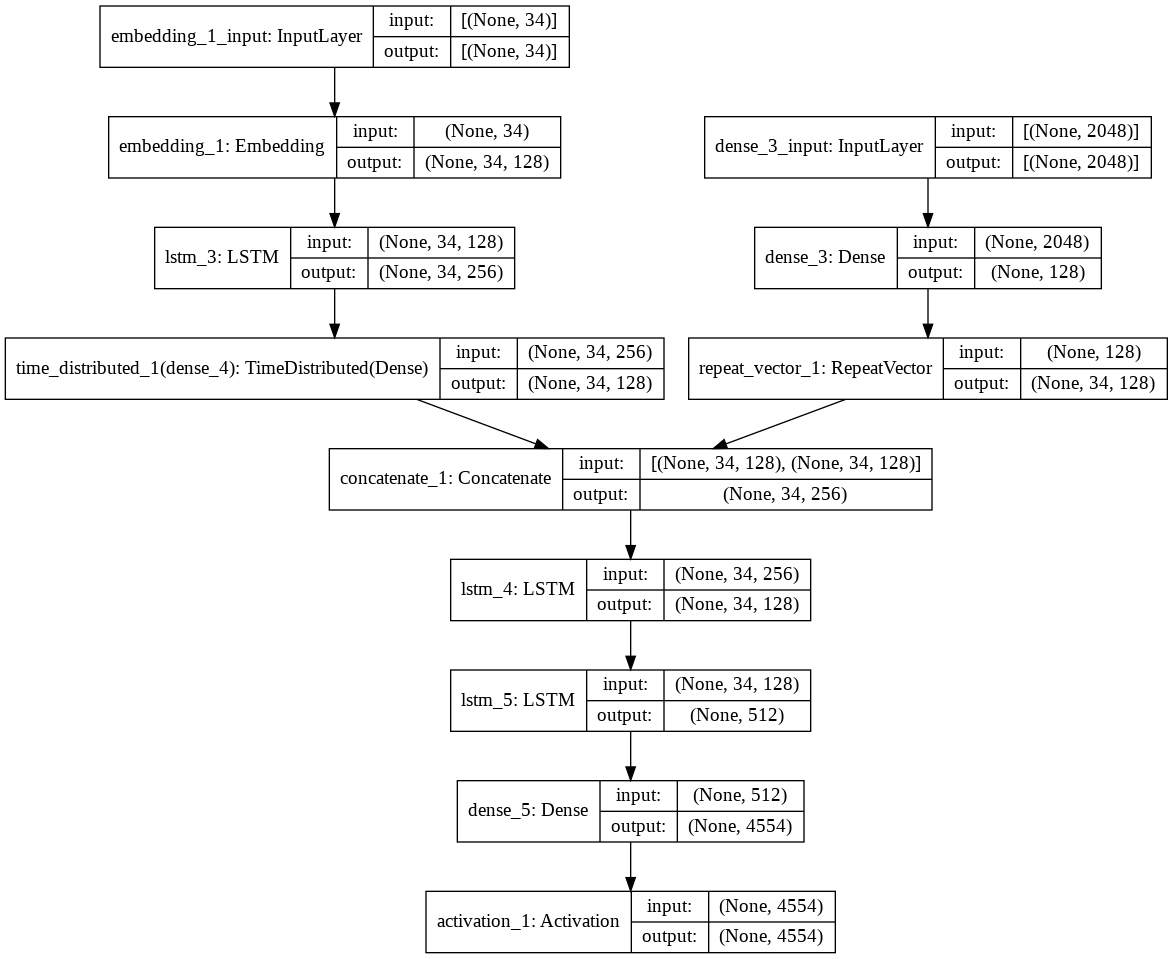

In [84]:
from keras.utils import plot_model
plot_model(model, show_shapes= True)

In [85]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
239/239 [==============================] - 49s 181ms/step - loss: 5.3621 - accuracy: 0.1451
Epoch 2/50
239/239 [==============================] - 43s 180ms/step - loss: 4.5847 - accuracy: 0.2367
Epoch 3/50
239/239 [==============================] - 43s 180ms/step - loss: 4.3320 - accuracy: 0.2590
Epoch 4/50
239/239 [==============================] - 43s 179ms/step - loss: 4.2092 - accuracy: 0.2705
Epoch 5/50
239/239 [==============================] - 43s 179ms/step - loss: 4.0350 - accuracy: 0.2896
Epoch 6/50
239/239 [==============================] - 43s 180ms/step - loss: 3.8124 - accuracy: 0.3111
Epoch 7/50
239/239 [==============================] - 43s 180ms/step - loss: 3.6565 - accuracy: 0.3258
Epoch 8/50
239/239 [==============================] - 43s 180ms/step - loss: 3.4781 - accuracy: 0.3432
Epoch 9/50
239/239 [==============================] - 43s 180ms/step - loss: 3.3617 - accuracy: 0.3552
Epoch 10/50
239/239 [==============================] - 43s 180ms/step - l

In [86]:
inv_dict = {v:k for k, v in count_words.items()}

In [87]:
model.save('/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/model.h5')

In [88]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/model_weights.h5')

In [89]:
np.save('/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/vocab.npy', count_words)

In [53]:
images

['/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381052465_722e00807b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381239475_044cbffa2b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381275595_b429fd1639.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381514859_b40418d9c3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/381976882_0063d16d88.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382090166_be2c2c63e1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382151094_c7376cf22b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/382701159_f98c1988cd.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/383223174_7165a54c30.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image_ Captioning/dataset/Images/384465370_9918873

In [99]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [116]:
test_feature = modele.predict(getImage(6001)).reshape(1,2048)

In [117]:
test_image_path = images[6001]

test_img = cv2.imread(test_image_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


Text(0.5, 0, ' two boys wearing green clothes are smiling and one is standing with a cup . endofseq')

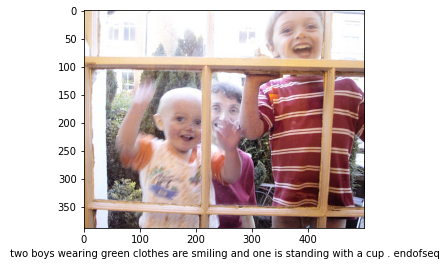

In [118]:
text_inp = ['startofseq']

count = 0
caption = ''
while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
plt.figure()
plt.imshow(test_img)
plt.xlabel(caption)